<h1><center><u><font color='#03A9F4'>Pre - Preparation</h></center></u></font><a id = "PP"></a></font></h>

### <font color='#34B2E4'> Importing required libraries


In [1]:
# Import the required libraries

# Importing numpy and pandas to work on dataframe
import numpy as np
import pandas as pd
import random

# Importing libraries for data visulisation
import matplotlib.pyplot as plt 
import plotly.express as px
import seaborn as sns
import datetime

# This library will be required to split the data set into train and test sets respectively.
from sklearn.model_selection import train_test_split

# This will be required to scale the data.
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# Importing Libraries for Model building
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.metrics import roc_auc_score, confusion_matrix,classification_report
from imblearn.metrics import sensitivity_specificity_support
from sklearn.model_selection import StratifiedKFold, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import xgboost as xgb
from xgboost.sklearn import XGBClassifier



#importing library to ignore the warnings
import warnings
warnings.filterwarnings('ignore')

C:\Users\simrankaur.badan\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
C:\Users\simrankaur.badan\AppData\Local\Continuum\anaconda3\lib\site-packages\dask\config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
C:\Users\simrankaur.badan\AppData\Local\Continuum\anaconda3\lib\site-packages\distributed\config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


### <font color='#34B2E4'> Setting up some user defined code to frequently use in this file

In [2]:
# Setting Color code to use in the file to make the outcomes more attentative.
red = '\033[1m\033[91m'
gre = '\033[1m\033[92m'
yel = '\033[1m\033[93m'
blu = '\033[1m\033[94m'
pur = '\033[1m\033[95m'
lbl = '\033[1m\033[96m'
Gra = '\033[1m\033[97m'
nill = '\033[0m'
bold = '\033[1m'
ul = '\033[4m'
nl = '\n'
line = '-------------------------------------------------------------------------------------------------------------------'
#to avoid "SettingWithCopyWarning" warning
pd.options.mode.chained_assignment = None
# to set the number format to numerical rather than scientific. 
pd.set_option('display.float_format', lambda x: '%.2f' % x)
# To display all the columns & Rows
pd.options.display.max_columns = None
pd.options.display.max_rows = None
# To map Empty Strings or numpy.inf as Na Values
pd.options.mode.use_inf_as_na = True
# setting up cell width to 90% for better viewing experience
# display(HTML("<style>.container { width:95% !important; }</style>")) 

<h1><center><u><font color='#e60000'>Data Sourcing</h></center></u></font><a id = 'data'></a>

### <font color='#E65050'> Loading Input Files to dataframe

In [3]:
# Lets upload the files to dataframe

main_df = pd.read_csv('telecom_churn_data.csv', low_memory=False)

print('Our Telecom Data Frame contains total ' + blu + str(main_df.shape[0]) + ' Rows ' + nill
      + 'and ' + red + str(main_df.shape[1]) + ' Columns ')

main_df.head(5)


Our Telecom Data Frame contains total 99999 Rows and 226 Columns 


mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109            0.00            0.00            0.00   
1     7001865778        109            0.00            0.00            0.00   
2     7001625959        109            0.00            0.00            0.00   
3     7001204172        109            0.00            0.00            0.00   
4     7000142493        109            0.00            0.00            0.00   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9  arpu_6  arpu_7  arpu_8  arpu_9  onnet_mou_6  \
0            9/30/2014  197.38  214.82  213.80   21.10          nan   
1            9/30/2014   34.05  355.07  268.32   86.28        24.11   
2            9/30/2014  167.69  189.06  210.23  290.71        11.54   
3            9/30/2014  221.34  251.10  508.05  389.50        99.91   
4            9/30/2014  261.64  309.88  238.17  163.43        50.31   

   onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0          nan         0.00          nan           nan           nan   
1        78.68         7.68        18.34         15.74         99.84   
2        55.24        37.26        74.81        143.33        220.59   
3        54.39       310.98       241.71        123.31        109.01   
4       149.44        83.89        58.78         76.96         91.88   

   offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0          0.00           nan            nan            nan           0.00   
1        304.76         53.76           0.00           0.00           0.00   
2        208.36        118.91           0.00           0.00           0.00   
3         71.68        113.54           0.00          54.86          44.38   
4        124.26         45.81           0.00           0.00           0.00   

   roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0            nan            nan            nan           0.00            nan   
1           0.00           0.00           0.00           0.00           0.00   
2          38.49           0.00           0.00           0.00          70.94   
3           0.00           0.00          28.09          39.04           0.00   
4           0.00           0.00           0.00           0.00           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0               nan               nan              0.00               nan   
1             23.88             74.56              7.68             18.34   
2              7.19             28.74             13.58             14.39   
3             73.68             34.81             10.61             15.49   
4             50.31            149.44             83.89             58.78   

   loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0               nan               nan              0.00               nan   
1             11.51             75.94            291.86             53.76   
2             29.34             16.86             38.46             28.16   
3            107.43             83.21             22.46             65.46   
4             67.64             91.88            124.26             37.89   

   loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0               nan               nan              0.00               nan   
1              0.00              0.00              0.00              0.00   
2             24.11             21.79             15.61             22.24   
3              1.91              0.65              4.91              2.06  

<h1><center><u><font color='#936d46'>Data Understanding and Cleaning</h></center></u></font><a id = 'data_understanding'></a>

### <font color='#C99459'> Now Understand House dataframe and clean data to perform visual inspection

In [4]:
# Now get a quick overview of the datasets
print('\n'+line+bold+blu+'\nGeneral Information of House dataframe\n'+nill)
main_df.info(verbose=True)
print('\n'+line+bold+blu+'\nStatistical Information of House dataframe\n'+nill)
main_df.describe()


-------------------------------------------------------------------------------------------------------------------
General Information of House dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   mobile_number             int64  
 1   circle_id                 int64  
 2   loc_og_t2o_mou            float64
 3   std_og_t2o_mou            float64
 4   loc_ic_t2o_mou            float64
 5   last_date_of_month_6      object 
 6   last_date_of_month_7      object 
 7   last_date_of_month_8      object 
 8   last_date_of_month_9      object 
 9   arpu_6                    float64
 10  arpu_7                    float64
 11  arpu_8                    float64
 12  arpu_9                    float64
 13  onnet_mou_6               float64
 14  onnet_mou_7               float64
 15  onnet_mou_8               float64
 16  onnet_mou_9               

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
count       99999.00   99999.00        98981.00        98981.00   
mean   7001207270.39     109.00            0.00            0.00   
std        695669.39       0.00            0.00            0.00   
min    7000000074.00     109.00            0.00            0.00   
25%    7000606232.50     109.00            0.00            0.00   
50%    7001204632.00     109.00            0.00            0.00   
75%    7001812030.50     109.00            0.00            0.00   
max    7002410905.00     109.00            0.00            0.00   

       loc_ic_t2o_mou   arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  \
count        98981.00 99999.00 99999.00 99999.00 99999.00     96062.00   
mean             0.00   282.99   278.54   279.15   261.65       132.40   
std              0.00   328.44   338.16   344.47   342.00       297.21   
min              0.00 -2258.71 -2014.05  -945.81 -1899.51         0.00   
25%              0.00    93.41    86.98    84.13    62.69         7.38   
50%              0.00   197.70   191.64   192.08   176.85        34.31   
75%              0.00   371.06   365.34   369.37   353.47       118.74   
max              0.00 27731.09 35145.83 33543.62 38805.62      7376.71   

       onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
count     96140.00     94621.00     92254.00      96062.00      96140.00   
mean        133.67       133.02       130.30        197.94        197.05   
std         308.79       308.95       308.48        316.85        325.86   
min           0.00         0.00         0.00          0.00          0.00   
25%           6.66         6.46         5.33         34.73         32.19   
50%          32.33        32.36        29.84         96.31         91.73   
75%         115.59       115.86       112.13        231.86        226.82   
max        8157.78     10752.56     10427.46       8362.36       9667.13   

       offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  \
count      94621.00      92254.00       96062.00       96140.00   
mean         196.57        190.34           9.95           7.15   
std          327.17        319.40          72.83          73.45   
min            0.00          0.00           0.00           0.00   
25%           31.63         27.13           0.00           0.00   
50%           92.14         87.29           0.00           0.00   
75%          228.26        220.50           0.00           0.00   
max        14007.34      10310.76       13724.38       15371.04   

       roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  \
count       94621.00       92254.00       96062.00       96140.00   
mean            7.29           6.34          13.91           9.82   
std            68.40          57.14          71.44          58.46   
min             0.00           0.00           0.00           0.00   
25%             0.00           0.00           0.00           0.00   
50%             0.00           0.00           0.00           0.00   
75%             0.00           0.00           0.00           0.00   
max         13095.36        8464.03        3775.11        2812.04   

       roam_og_mou_8  roam_og_mou_9  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
count       94621.00       92254.00          96062.00          96140.00   
mean            9.97           8.56             47.10             46.47   
std            64.71          58.44            150.86            155.32   
min             0.00           0.00              0.00              0.00   
25%             0.00           0.00              1.66              1.63   
50%             0.00           0.00             11.91             11.61   
75%             0.00           0.00             40.96             39.91   
max          5337.04        4428.46           6431.33           7400.66   

       loc_og_t2t_mou_8  loc_og_t2t_mou_9  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
count          94621.00          92254.00          96062.00         

In [5]:
# There are new columns that dont follow the standard naming convention like aug_vbc_3g, jul_vbc_3g etc. Lets rename them

main_df = main_df.rename(columns = {'aug_vbc_3g':'vbc_3g_8', 'jul_vbc_3g': 'vbc_3g_7' ,
                                    'jun_vbc_3g':'vbc_3g_6' , 'sep_vbc_3g':'vbc_3g_9'})

In [6]:
# Dropping Duplicates if any

main_df=main_df.drop_duplicates()

In [7]:
#droping the ID columns such as mobile_number, Circle ID, which are not relevent for modeling
main_df = main_df.drop(columns = ['mobile_number','circle_id'])

#Also droping all the date columns as we are not going to perform any time seriese analysis
date_cols = [col for col in main_df.columns if 'date' in col]
main_df = main_df.drop(columns = date_cols)

In [8]:
# We will check which columns have only one unique value,(Handling duplicate values)
# as these columns wont be helpfull in our analysis, we will drop them too
c_w_uv = main_df.nunique()[main_df.nunique() <= 1]
if len(c_w_uv) == 0:
    print(blu+line+nill)
    print('There are '+blu+'no columne'+nill+' ovserved '+blu+'with single unique value')
    print(blu+line+nill)
else:
    print(c_w_uv)
    print(blu+line+nill)
    print('As above columns have '+red+'single unique values'+nill+', so we will drop those columns from our dataframe')
    print('Now our Data Frame contains total ' + blu + str(main_df.shape[0]) + ' Rows ' + nill
      + 'and ' + red + str(main_df.shape[1]) + ' Columns ')
    print(blu+line+nill)
    main_df.drop(columns = list(c_w_uv.index),inplace = True)

loc_og_t2o_mou      1
std_og_t2o_mou      1
loc_ic_t2o_mou      1
std_og_t2c_mou_6    1
std_og_t2c_mou_7    1
std_og_t2c_mou_8    1
std_og_t2c_mou_9    1
std_ic_t2o_mou_6    1
std_ic_t2o_mou_7    1
std_ic_t2o_mou_8    1
std_ic_t2o_mou_9    1
dtype: int64
-------------------------------------------------------------------------------------------------------------------
As above columns have single unique values, so we will drop those columns from our dataframe
Now our Data Frame contains total 99999 Rows and 212 Columns 
-------------------------------------------------------------------------------------------------------------------


### <font color='#C99459'> Filtering data for High Value Customers (HVC)
    
As per provided definition : Customer who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the months of the June(6) and July(7) also considered as good phase.

In [9]:
#First Calculate the Total amount spend by customer in June and jule and then take the average of the same

#Total Spent for June
main_df['Jun_total_Spent'] = (main_df['av_rech_amt_data_6'] * main_df['total_rech_data_6']).fillna(0)+main_df['total_rech_amt_6']

#Total Spent for July
main_df['Jul_total_Spent'] = (main_df['av_rech_amt_data_7'] * main_df['total_rech_data_7']).fillna(0)+main_df['total_rech_amt_7']

#Average of June and July
main_df['Good_phase_avg_rech'] = (main_df['Jun_total_Spent'] + main_df['Jul_total_Spent'])/2

#Calculating 70% percentile of the average revenue of customer in good phase
HVC_threshold = np.percentile(main_df['Good_phase_avg_rech'], 70.0)
print(blu+line+nill)
print(blu + '70% percentile' + nill + ' of average recharge by Customer in their good phase is ' + blu 
      + str(HVC_threshold)+nill)

#As per provided instrucitons, We will only keep customer greate the HVC_threshold for our analysis
main_df = main_df[main_df['Good_phase_avg_rech'] > HVC_threshold]

#Our Final High value customer data 
print('\nFinal Count of '+red+'Total High value customers '+nill+'are '+ red+str(main_df.shape[0]))
print(blu+line+nill)

#Removing the additional Column created to calculate HVC
main_df = main_df.drop(columns = ['Jun_total_Spent','Jul_total_Spent','Good_phase_avg_rech'])

-------------------------------------------------------------------------------------------------------------------
70% percentile of average recharge by Customer in their good phase is 478.0

Final Count of Total High value customers are 29953
-------------------------------------------------------------------------------------------------------------------


### <font color='#C99459'> Labeling Churn and non Churn
    
As we are performing predection for usage based chrun, We will tag the churned customers (churn=1, else 0) based on the September month Usage. 
Those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase. 

The attributes we will use to tag churners are:

<font color='#34B2E4'>&emsp;&emsp;&#9673;</font><b> total_ic_mou_9</b><br>
<font color='#34B2E4'>&emsp;&emsp;&#9673;</font><b> total_og_mou_9</b><br>
<font color='#34B2E4'>&emsp;&emsp;&#9673;</font><b> vol_2g_mb_9</b><br>
<font color='#34B2E4'>&emsp;&emsp;&#9673;</font><b> vol_3g_mb_9</b>

After tagging churners, remove all the attributes corresponding to the churn phase (all attributes having ‘ _9’, etc. in their names).

In [10]:
#First of all we will check weather the relative columns contain any mull value or not
print(blu+line+nill)
print('Checking the count of null value in relevent columnes\n')
print('Total null value in column '+red+'total_ic_mou_9'+nill+' are '+red+ str(main_df['total_ic_mou_9'].isnull().sum())+nill)
print('Total null value in column '+red+'total_og_mou_9'+nill+' are '+red+ str(main_df['total_og_mou_9'].isnull().sum())+nill)
print('Total null value in column '+red+'vol_2g_mb_9'+nill+' are '+red+ str(main_df['vol_2g_mb_9'].isnull().sum())+nill)
print('Total null value in column '+red+'vol_3g_mb_9'+nill+' are '+red+ str(main_df['vol_3g_mb_9'].isnull().sum())+nill)
print(blu+line+nill)


-------------------------------------------------------------------------------------------------------------------
Checking the count of null value in relevent columnes

Total null value in column total_ic_mou_9 are 0
Total null value in column total_og_mou_9 are 0
Total null value in column vol_2g_mb_9 are 0
Total null value in column vol_3g_mb_9 are 0
-------------------------------------------------------------------------------------------------------------------


<b><u><font color = '#C99459'>Observations:</b></u></font>

As there are <font color = '#C99459'><b>no null value</font></b> in relevant column, So we can go ahead and label the churn and non churn based on these columns. 

In [11]:
#So if the total usage for total_ic_mou_9, total_og_mou_9, vol_2g_mb_9,vol_3g_mb_9 in Sep month is zero then its churn

main_df['churn'] = np.where(main_df[['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']].sum(axis=1) == 0, 1,0)

#As we have labled our data as Churn/Non Churn, So we can remove the data for 9th Month now
sep_month_data = [col for col in main_df.columns if '_9' in col]

main_df.drop(sep_month_data, axis=1, inplace=True)

print(blu+line+nill)
print('Now data frame for '+red+'Good and action phase contain '+nill+'Total '+ red+str(main_df.shape[0])+' Rows'
      +nill+' and '+blu+str(main_df.shape[1])+' columns'+nill)

total = main_df['churn'].count()
churn_c = main_df['churn'].value_counts().values[1]
churn_P = round(churn_c/total,2)*100
nchurn_c = main_df['churn'].value_counts().values[0]
nchurn_P = round(nchurn_c/total,2)*100


print('Total '+red+'churn cases'+nill+ ' are '+ red+ str(churn_c) +nill+', Which contribute ' +red+str(churn_P)+' %'+nill
      +' out of total '+red+str(total)+' customers'+nill)

print('Total '+gre+'retained cases'+nill+ ' are '+ gre+ str(nchurn_c) +nill+', Which contribute ' +gre+str(nchurn_P)+' %'+nill
      +' out of total '+gre+str(total)+' customers'+nill)

print(blu+line+nill)

churn_ratio = main_df['churn'].value_counts()
bar_chart = px.bar(churn_ratio, x = churn_ratio.index, y = churn_ratio.values,
               labels = {'x':'0 as Non Churn Customer & 1 as Churn Customer','y':'Count of customer'}, height=400, width = 800, 
               color=churn_ratio.values, title = 'Customer Ratio of Churn Vs non Churn',opacity=0.7,
               template='plotly_dark',text = np.round(churn_ratio.values/main_df.shape[0]*100,2))

bar_chart.show()
print(blu+line+nill)

-------------------------------------------------------------------------------------------------------------------
Now data frame for Good and action phase contain Total 29953 Rows and 152 columns
Total churn cases are 2433, Which contribute 8.0 % out of total 29953 customers
Total retained cases are 27520, Which contribute 92.0 % out of total 29953 customers
-------------------------------------------------------------------------------------------------------------------


-------------------------------------------------------------------------------------------------------------------


### <font color='#C99459'> Handling missing values
    
NO we will be working to handling the null Values in our data frame, as it is a crucial step for any model building 

We will be using sevral method to deal with Null value in our data, such as:

<font color='#34B2E4'>&emsp;&emsp;&#9673;</font><b> Removing column with more then 70% null Value</b><br>
<font color='#34B2E4'>&emsp;&emsp;&#9673;</font><b> Removing Rows with less then 5 % of missing value</b><br>
<font color='#34B2E4'>&emsp;&emsp;&#9673;</font><b> Imputing values with mean, mode, or zeros</b><br>
<font color='#34B2E4'>&emsp;&emsp;&#9673;</font><b> imputing value using KNN imputation</b>


In [12]:
#As we realised that there are several columns which have null values, So lets analyse and treat those columns
null_columns = (main_df.isnull().sum()/len(main_df.index))*100
n = null_columns[null_columns >0]
n_70 = null_columns[null_columns > 70]
n_5 = null_columns[(null_columns > 0) & (null_columns <= 5)]
print(blu+line+nill)

print('Total numbers of '+blu+'columns '+nill+'in main_df dataframe are ' + blu +str(main_df.shape[1]) +nill)
print('Out of which ' +red+ str(len(n))+' columns '+nill+'contains null values')

print(blu+line+nill)

print('As we have ' +gre+ str(len(n_70))+' columns that have greather then 70% null values'+nill
      +', So no column needed to be removed\n')

print('We also observed that there are ' +yel+ str(len(n_5))+' columns that have less then 5% null values'+nill
      +', So We will remove Rows from these columns\n')

for i in n_5.index:
    main_df.dropna(subset=[i],inplace=True)


#Recalculating the olumn with null value
null_columns = (main_df.isnull().sum()/len(main_df.index))*100
n = null_columns[null_columns >0]
print('Now We have left with ' +red+ str(len(n))+' columns that have less then %% null values'+nill
      +', \nAs null values are segnificant high, So We will try to impute them\n')
print(n)

-------------------------------------------------------------------------------------------------------------------
Total numbers of columns in main_df dataframe are 152
Out of which 108 columns contains null values
-------------------------------------------------------------------------------------------------------------------
As we have 0 columns that have greather then 70% null values, So no column needed to be removed

We also observed that there are 81 columns that have less then 5% null values, So We will remove Rows from these columns

Now We have left with 27 columns that have less then %% null values, 
As null values are segnificant high, So We will try to impute them

total_rech_data_6    44.50
total_rech_data_7    43.01
total_rech_data_8    45.80
max_rech_data_6      44.50
max_rech_data_7      43.01
max_rech_data_8      45.80
count_rech_2g_6      44.50
count_rech_2g_7      43.01
count_rech_2g_8      45.80
count_rech_3g_6      44.50
count_rech_3g_7      43.01
count_rech_3g_

In [13]:
# After inspecting the data and based on business understanding, this is how we will treat the various column

# total_rech_data = Its a Number of recharge made by user, so missing value means zero reacharge for the month
for col in ['total_rech_data_6','total_rech_data_7','total_rech_data_8']:
    main_df[col].fillna(0, inplace=True)

# max_rech_data = this shows the maximum amount of any recharge, as all the missing value also show total recharge count as 0.
#So if there were no recharge so max value would also be Zero.
for col in ['max_rech_data_6','max_rech_data_7','max_rech_data_8']:
    main_df[col].fillna(0, inplace=True)

# count_rech_2g = If total recharge count if 0, then subset of that (like 2g & 3g recharge) would also be 0
for col in ['count_rech_2g_6','count_rech_2g_7','count_rech_2g_8']:
    main_df[col].fillna(0, inplace=True)

# count_rech_3g = If total recharge count if 0, then subset of that (like 2g & 3g recharge) would also be 0
for col in ['count_rech_3g_6','count_rech_3g_7','count_rech_3g_8']:
    main_df[col].fillna(0, inplace=True)

# av_rech_amt_data = if there are no recharge in that month, then average recharge amount would also be 0
for col in ['av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_8']:
    main_df[col].fillna(0, inplace=True)

# arpu_3g = if there no recharge for 3G, then there would be no average revenue per unit for that month.
for col in ['arpu_3g_6','arpu_3g_7','arpu_3g_8']:
    main_df[col].fillna(main_df[col].mean(), inplace=True)

# arpu_2g = if there no recharge for 2G, then there would be no average revenue per unit for that month.
for col in ['arpu_2g_6','arpu_2g_7','arpu_2g_8']:
    main_df[col].fillna(main_df[col].mean(), inplace=True)

# night_pck_user = As this columne is categorical column, having value in 0 and 1, we will impute this as categorical only
for col in ['night_pck_user_6','night_pck_user_7','night_pck_user_8']:
    main_df[col] = main_df[col].fillna(-1).astype(int)

# fb_user = As this columne is categorical column, having value in 0 and 1, we will impute this as categorical only
for col in ['fb_user_6','fb_user_7','fb_user_8']:
    main_df[col] = main_df[col].fillna('-1').astype(int)

    
# #Let check the status of missing value now.

null_columns = (main_df.isnull().sum()/len(main_df.index))*100
n = null_columns[null_columns >0]

print(blu+line+nill)
print(gre+'Status of missing values in data frame post imputation\n'+nill)
print('Out of total  '+ blu +str(main_df.shape[1]) +' columns '+nill+'in main_df dataframe' )
print(red+ str(len(n))+' columns '+nill+'contains null values')

print(blu+line+nill)
null_columns

-------------------------------------------------------------------------------------------------------------------
Status of missing values in data frame post imputation

Out of total  152 columns in main_df dataframe
0 columns contains null values
-------------------------------------------------------------------------------------------------------------------


arpu_6               0.00
arpu_7               0.00
arpu_8               0.00
onnet_mou_6          0.00
onnet_mou_7          0.00
onnet_mou_8          0.00
offnet_mou_6         0.00
offnet_mou_7         0.00
offnet_mou_8         0.00
roam_ic_mou_6        0.00
roam_ic_mou_7        0.00
roam_ic_mou_8        0.00
roam_og_mou_6        0.00
roam_og_mou_7        0.00
roam_og_mou_8        0.00
loc_og_t2t_mou_6     0.00
loc_og_t2t_mou_7     0.00
loc_og_t2t_mou_8     0.00
loc_og_t2m_mou_6     0.00
loc_og_t2m_mou_7     0.00
loc_og_t2m_mou_8     0.00
loc_og_t2f_mou_6     0.00
loc_og_t2f_mou_7     0.00
loc_og_t2f_mou_8     0.00
loc_og_t2c_mou_6     0.00
loc_og_t2c_mou_7     0.00
loc_og_t2c_mou_8     0.00
loc_og_mou_6         0.00
loc_og_mou_7         0.00
loc_og_mou_8         0.00
std_og_t2t_mou_6     0.00
std_og_t2t_mou_7     0.00
std_og_t2t_mou_8     0.00
std_og_t2m_mou_6     0.00
std_og_t2m_mou_7     0.00
std_og_t2m_mou_8     0.00
std_og_t2f_mou_6     0.00
std_og_t2f_mou_7     0.00
std_og_t2f_m

In [14]:
main_df.to_csv('Working before EDA.csv', index = False)

<h1><center><u><font color='#ff7b25'>Exploratory Data Analysis</h></center></u></font><a id = 'EDA'></a>

In [15]:
main_df = pd.read_csv('Working before EDA.csv', low_memory=False)

### <font color='#8B103E'> Driving Metrics <font>
    
    
<font color='#000000'>As we observe Our data have multiple variables, and while exploring those variables we will <font color='#8B103E'>Drive New Variables</font> For example, Our good phase contain data of 2 month and its cant be compare to action phase as its have only one month, so we will take the average of both months from Good phase and then seek the difference from action phase to see the impact 

### <font color='#8B103E'> Creating Average from June and July month <font>

In [16]:
# Now we will create new Colunms for Good phase by taking average of 6 and 7th Month
# gp represent the Good phase

#first creating list of all relevent columns
list_col = ['arpu_','onnet_mou_','offnet_mou_','roam_ic_mou_','roam_og_mou_','loc_og_t2t_mou_','loc_og_t2m_mou_',
            'loc_og_t2f_mou_','loc_og_t2c_mou_','loc_og_mou_','std_og_t2t_mou_','std_og_t2m_mou_','std_og_t2f_mou_',
            'std_og_mou_','isd_og_mou_','spl_og_mou_','og_others_','total_og_mou_','loc_ic_t2t_mou_','loc_ic_t2m_mou_',
            'loc_ic_t2f_mou_','loc_ic_mou_','std_ic_t2t_mou_','std_ic_t2m_mou_','std_ic_t2f_mou_','std_ic_mou_',
            'total_ic_mou_','spl_ic_mou_','isd_ic_mou_','ic_others_','total_rech_num_','total_rech_amt_','max_rech_amt_',
            'last_day_rch_amt_','total_rech_data_','max_rech_data_','count_rech_2g_','count_rech_3g_','av_rech_amt_data_',
            'vol_2g_mb_','vol_3g_mb_','arpu_3g_','arpu_2g_','monthly_2g_','sachet_2g_','monthly_3g_','sachet_3g_','vbc_3g_']

# Run Loop to calculate the average of each column for above mention variable from good phase
for i in list_col:
    main_df[i+'gp'] = (main_df[i+'6']+main_df[i+'7'])/2


### <font color='#8B103E'> Comparing Good phase variable from Action phase <font>

In [17]:
# Run Loop to calculate the different bwtween Good phase and action phase.

for i in list_col:
    main_df[i+'Diff'] = (main_df[i+'8']-main_df[i+'gp'])
    

### <font color='#8B103E'> Dropping unnecessary columns <font>

In [18]:
# As we have created Good phase variables, we wont need columns from 7th and 8th months anymore. 

for i in list_col:
    main_df.drop(columns = i+'6',inplace = True)
    main_df.drop(columns = i+'7',inplace = True)

main_df.shape


(28460, 152)

In [19]:
# Segrigatting our Numarical and categorical variabls, 
#as all values mentioned as int or flot, so we will see if unique count for any value is less then 5 then we will consider Cat

cat_var = []
for col in main_df:
    if len(main_df[col].value_counts()) <= 5:
        cat_var.append(col)

con_var = [col for col in main_df.columns if col not in cat_var]

main_df[con_var] = main_df[con_var].apply(pd.to_numeric)
main_df[cat_var] = main_df[cat_var].apply(lambda column: column.astype("category"), axis=0)


# Indentifying Categorical and Continious Variable

print(blu+line+nill+nl+bold+'Total Numbers of Variables '+red+str(main_df.shape[1])+nill+bold+' Out of which '+nl)


dep_var = 'churn'
print(nl+bold+ul+blu+'Dependent Variable is : '+nill)
print(dep_var)


cat_var = main_df.columns[(main_df.dtypes == 'category') & (main_df.columns!='churn')]
print(nl+bold+ul+gre+'Total Numbers of Categorical Variable are : '+str(len(cat_var))+nill+nl)
print(cat_var.values)

con_var = main_df.columns[main_df.dtypes != 'category']
print(nl+bold+ul+red+'Total Numbers of Numaric Variable are : '+str(len(con_var))+nill+nl)
print(con_var.values)
print(nl+blu+line+nill)



-------------------------------------------------------------------------------------------------------------------
Total Numbers of Variables 152 Out of which 


Dependent Variable is : 
churn

Total Numbers of Categorical Variable are : 6

['night_pck_user_6' 'night_pck_user_7' 'night_pck_user_8' 'fb_user_6'
 'fb_user_7' 'fb_user_8']

Total Numbers of Numaric Variable are : 145

['arpu_8' 'onnet_mou_8' 'offnet_mou_8' 'roam_ic_mou_8' 'roam_og_mou_8'
 'loc_og_t2t_mou_8' 'loc_og_t2m_mou_8' 'loc_og_t2f_mou_8'
 'loc_og_t2c_mou_8' 'loc_og_mou_8' 'std_og_t2t_mou_8' 'std_og_t2m_mou_8'
 'std_og_t2f_mou_8' 'std_og_mou_8' 'isd_og_mou_8' 'spl_og_mou_8'
 'og_others_8' 'total_og_mou_8' 'loc_ic_t2t_mou_8' 'loc_ic_t2m_mou_8'
 'loc_ic_t2f_mou_8' 'loc_ic_mou_8' 'std_ic_t2t_mou_8' 'std_ic_t2m_mou_8'
 'std_ic_t2f_mou_8' 'std_ic_mou_8' 'total_ic_mou_8' 'spl_ic_mou_8'
 'isd_ic_mou_8' 'ic_others_8' 'total_rech_num_8' 'total_rech_amt_8'
 'max_rech_amt_8' 'last_day_rch_amt_8' 'total_rech_data_8'
 'max_rech_d

<h3><b><u><font color = '#F05131'>Observations:</b></u></font></h3>

As we can see that we have total 155 variables, out of which <b><font color='#A502201'>6 categorical variable and 148 continuous variable </b></font>.
<br> Our Dependent variable would be  <b><font color='#A502201'>Churn</b></font> 
<br>We will refer the <b><font color='#A502201'>Data+Dictionary-+Telecom+Churn+Case+Study.xlsx file</b></font> get the description of all the variable for better understanding.


<b><u><font color = '#538106'>Dependent Variable</u></b></font>

| S No| <b>Variable</b> | <b>Description</b> |    
|:-| :-------- |  :- | 
|1|Churn|            Status of Customer Churn/Non Churn ---> <b><u><font color = '#006E6D'>Dependent variable</u></b>|


<b><u><font color = '#E34856'>Categorical Data Variables Type</u></b></font>

| S No| <b>Variable</b> | <b>Description</b> |    
|:-| :-------- |  :- | 
|1|night_pck_user|Service scheme to avail services of Facebook and similar social networking sites|
|2|fb_user|Scheme to use during specific night hours only|


<b><u><font color = '#34B2E4'>Continuous Data Variable Type</u></b></font>

| S No| <b>Variable</b> | <b>Description</b> |    
|:-| :-------- | :- | 
|1|aon           |Age on Network|
|2|arpu           |Average revenue per user|
|3|arpu_2g           |Average revenue per user for 2G data|
|4|arpu_3g           |Average revenue per user for 3G data|
|5|av_rech_amt_data           |average amount of data rechargs|
|6|count_rech_2g           |Total count of 2G recharge|
|7|count_rech_3g           |Total count of 3G recharge|
|8|ic_others           |Others Incoming Calls|
|9|isd_ic_mou           |International incoming Calls|
|10|isd_og_mou           |International outgoing Calls|
|11|last_day_rch_amt           |Last date of recharge|
|12|loc_ic_mou           |Local incoming Calls|
|13|loc_ic_t2f_mou           |Local incoming Operator T to fixed line Calls|
|14|loc_ic_t2m_mou           |Local incoming Operator T to other operator Calls|
|15|loc_ic_t2t_mou           |Local Incoming same Operator T to T Calls|
|16|loc_og_mou           |Outside Circle outgoing same Operator T to T Calls|
|17|loc_og_t2c_mou           |Local outgoing Operator T to its own call center Calls|
|18|loc_og_t2f_mou           |Local outgoing Operator T to fixed line Calls|
|19|loc_og_t2m_mou           |Local outgoing Operator T to other operator Calls|
|20|loc_og_t2t_mou           |Local outgoing same Operator T to T Calls|
|21|max_rech_amt           |Maximum amount of rechargs|
|22|max_rech_data           |Maximum Number of rechargs for data|
|23|monthly_2g           |Monthly 2G data usage|
|24|monthly_3g           |Monthly 3G data usage|
|25|offnet_mou           |All kind of calls outside the operator T network|
|26|og_others           |Others outgoing Calls|
|27|onnet_mou           |All kind of calls within the same operator network|
|28|roam_ic_mou           |Indicates that customer is in roaming zone during the call - Incomming Calls|
|29|roam_og_mou           |Indicates that customer is in roaming zone during the call - Outgoing Calls|
|30|sachet_2g           |Less then monthly 2G data usage|
|31|sachet_3g           |Less then monthly 3G data usage|
|32|spl_ic_mou           |Special incoming Calls|
|33|spl_og_mou           |Special outgoing Calls|
|34|std_ic_mou           |Outside Circle incoming Calls|
|35|std_ic_t2f_mou           |Outside Circle incoming Operator T to fixed line Calls|
|36|std_ic_t2m_mou           |Outside Circle incoming Operator T to other mobile Calls|
|37|std_ic_t2t_mou           |Outside Circle incoming Operator T to same operator Calls|
|38|std_og_mou           |Outside Circle outgoing Calls|
|39|std_og_t2f_mou           |Outside Circle outgoing Operator T to its own call center Calls|
|40|std_og_t2m_mou           |Outside Circle outgoing Operator T to fixed line Calls|
|41|std_og_t2t_mou           |Outside Circle outgoing Operator T to other operator Calls|
|42|total_ic_mou           |Total Circle incoming Calls|
|43|total_og_mou           |Total outgoing Calls|
|44|total_rech_amt           |Total amount of rechargs|
|45|total_rech_data           |Total Number of rechargs for data|
|46|total_rech_num           |Total Number of rechargs|
|47|vbc_3g           |Volume based 3G data Cost|
|48|vol_2g_mb           |Total 2g data Usage|
|49|vol_3g_mb           |Total 3g data Usage|


<font color='#34B2E4'>-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### <font color='#C99459'> Handling Outliers for Continuous variables 
    
<font color='#000000'>Now we will check our data for any kind of Outliers, as if there are outliers then we will have to treat them for the better accuracy of our Model. We will use K sigma mathod to <font color='#8B103E'>treat outliers and Cap any outliers less/more then +-3singma</font>

In [20]:
# run a loop to cap the value of eevry variable to +-3 Sigma

for col in con_var:
    low_lim = main_df[col].mean()-3*main_df[col].std()
    upr_lim = main_df[col].mean()+3*main_df[col].std()    
    main_df[col][main_df[col]<low_lim] = low_lim
    main_df[col][main_df[col]>upr_lim] = upr_lim
    
main_df.describe()

arpu_8  onnet_mou_8  offnet_mou_8  roam_ic_mou_8  roam_og_mou_8  \
count 28460.00     28460.00      28460.00       28460.00       28460.00   
mean    516.24       227.54        334.76           9.69          15.69   
std     379.73       361.94        390.75          36.47          55.43   
min    -945.81         0.00          0.00           0.00           0.00   
25%     255.00        14.89         60.61           0.00           0.00   
50%     443.15        74.19        199.94           0.00           0.00   
75%     673.18       257.79        457.45           0.00           0.00   
max    2029.36      1637.91       1808.04         240.29         342.41   

       loc_og_t2t_mou_8  loc_og_t2m_mou_8  loc_og_t2f_mou_8  loc_og_t2c_mou_8  \
count          28460.00          28460.00          28460.00          28460.00   
mean              71.71            151.42              5.32              1.48   
std              130.50            193.78             12.10              4.16   
min                0.00              0.00              0.00              0.00   
25%                4.08             18.24              0.00              0.00   
50%               23.64             75.78              0.06              0.00   
75%               77.08            207.52              4.31              0.11   
max              780.20            870.61             66.01             23.67   

       loc_og_mou_8  std_og_t2t_mou_8  std_og_t2m_mou_8  std_og_t2f_mou_8  \
count      28460.00          28460.00          28460.00          28460.00   
mean         235.63            138.17            146.93              1.15   
std          295.50            304.19            297.88              4.80   
min            0.00              0.00              0.00              0.00   
25%           30.80              0.00              0.00              0.00   
50%          122.86              1.52             12.59              0.00   
75%          324.12             89.79            129.44              0.00   
max         1354.38           1363.41           1408.52             35.27   

       std_og_mou_8  isd_og_mou_8  spl_og_mou_8  og_others_8  total_og_mou_8  \
count      28460.00      28460.00      28460.00     28460.00        28460.00   
mean         300.84          1.11          6.03         0.02          558.45   
std          507.92         10.05         11.89         0.34          606.59   
min            0.00          0.00          0.00         0.00            0.00   
25%            0.00          0.00          0.00         0.00          100.31   
50%           33.64          0.00          0.66         0.00          362.14   
75%          387.15          0.00          6.56         0.00          802.66   
max         2168.76        138.92         68.93        10.27         2688.17   

       loc_ic_t2t_mou_8  loc_ic_t2m_mou_8  loc_ic_t2f_mou_8  loc_ic_mou_8  \
count          28460.00          28460.00          28460.00      28460.00   
mean              58.22            145.89             13.16        223.76   
std               92.31            170.50             27.17        251.13   
min                0.00              0.00              0.00          0.00   
25%                6.66             30.51              0.00         50.33   
50%               25.16             87.09              2.08        139.38   
75%               68.41            193.28             12.18        297.43   
max              553.27            807.51            148.04       1171.46   

       std_ic_t2t_mou_8  std_ic_t2m_mou_8  std_ic_t2f_mou_8  std_ic_mou_8  \
count          28460.00          28460.00          28460.00      28460.00   
mean              11.72             24.84              2.06         40.15   
std               32.33             53.95              7.68         79.25   
min                0.00              0.00              0.00          0.00   
25%                0.00              0.00              0.00          0.91   
50%                0.31        

### <font color='#8B103E'> Univariate Analysis : Visual inspection of numerical data<font>
    
    
<font color='#000000'>After finding out our numerical and categorical variables, lets draw some plot to inspect data<font>
    


In [21]:

# sns.distplot(main_df['arpu_8'])
plt.figure(figsize=(50, 550))

i = 0
for col in con_var:
    plt.subplot(49,3,i+1)
    sns.distplot(main_df[col])
    i = i+1
    

### <font color='#8B103E'> Univariate Analysis : Visual inspection of categorical data<font>
    
    
<font color='#000000'>After finding out our numerical and categorical variables, lets draw some plot to inspect data<font>
    


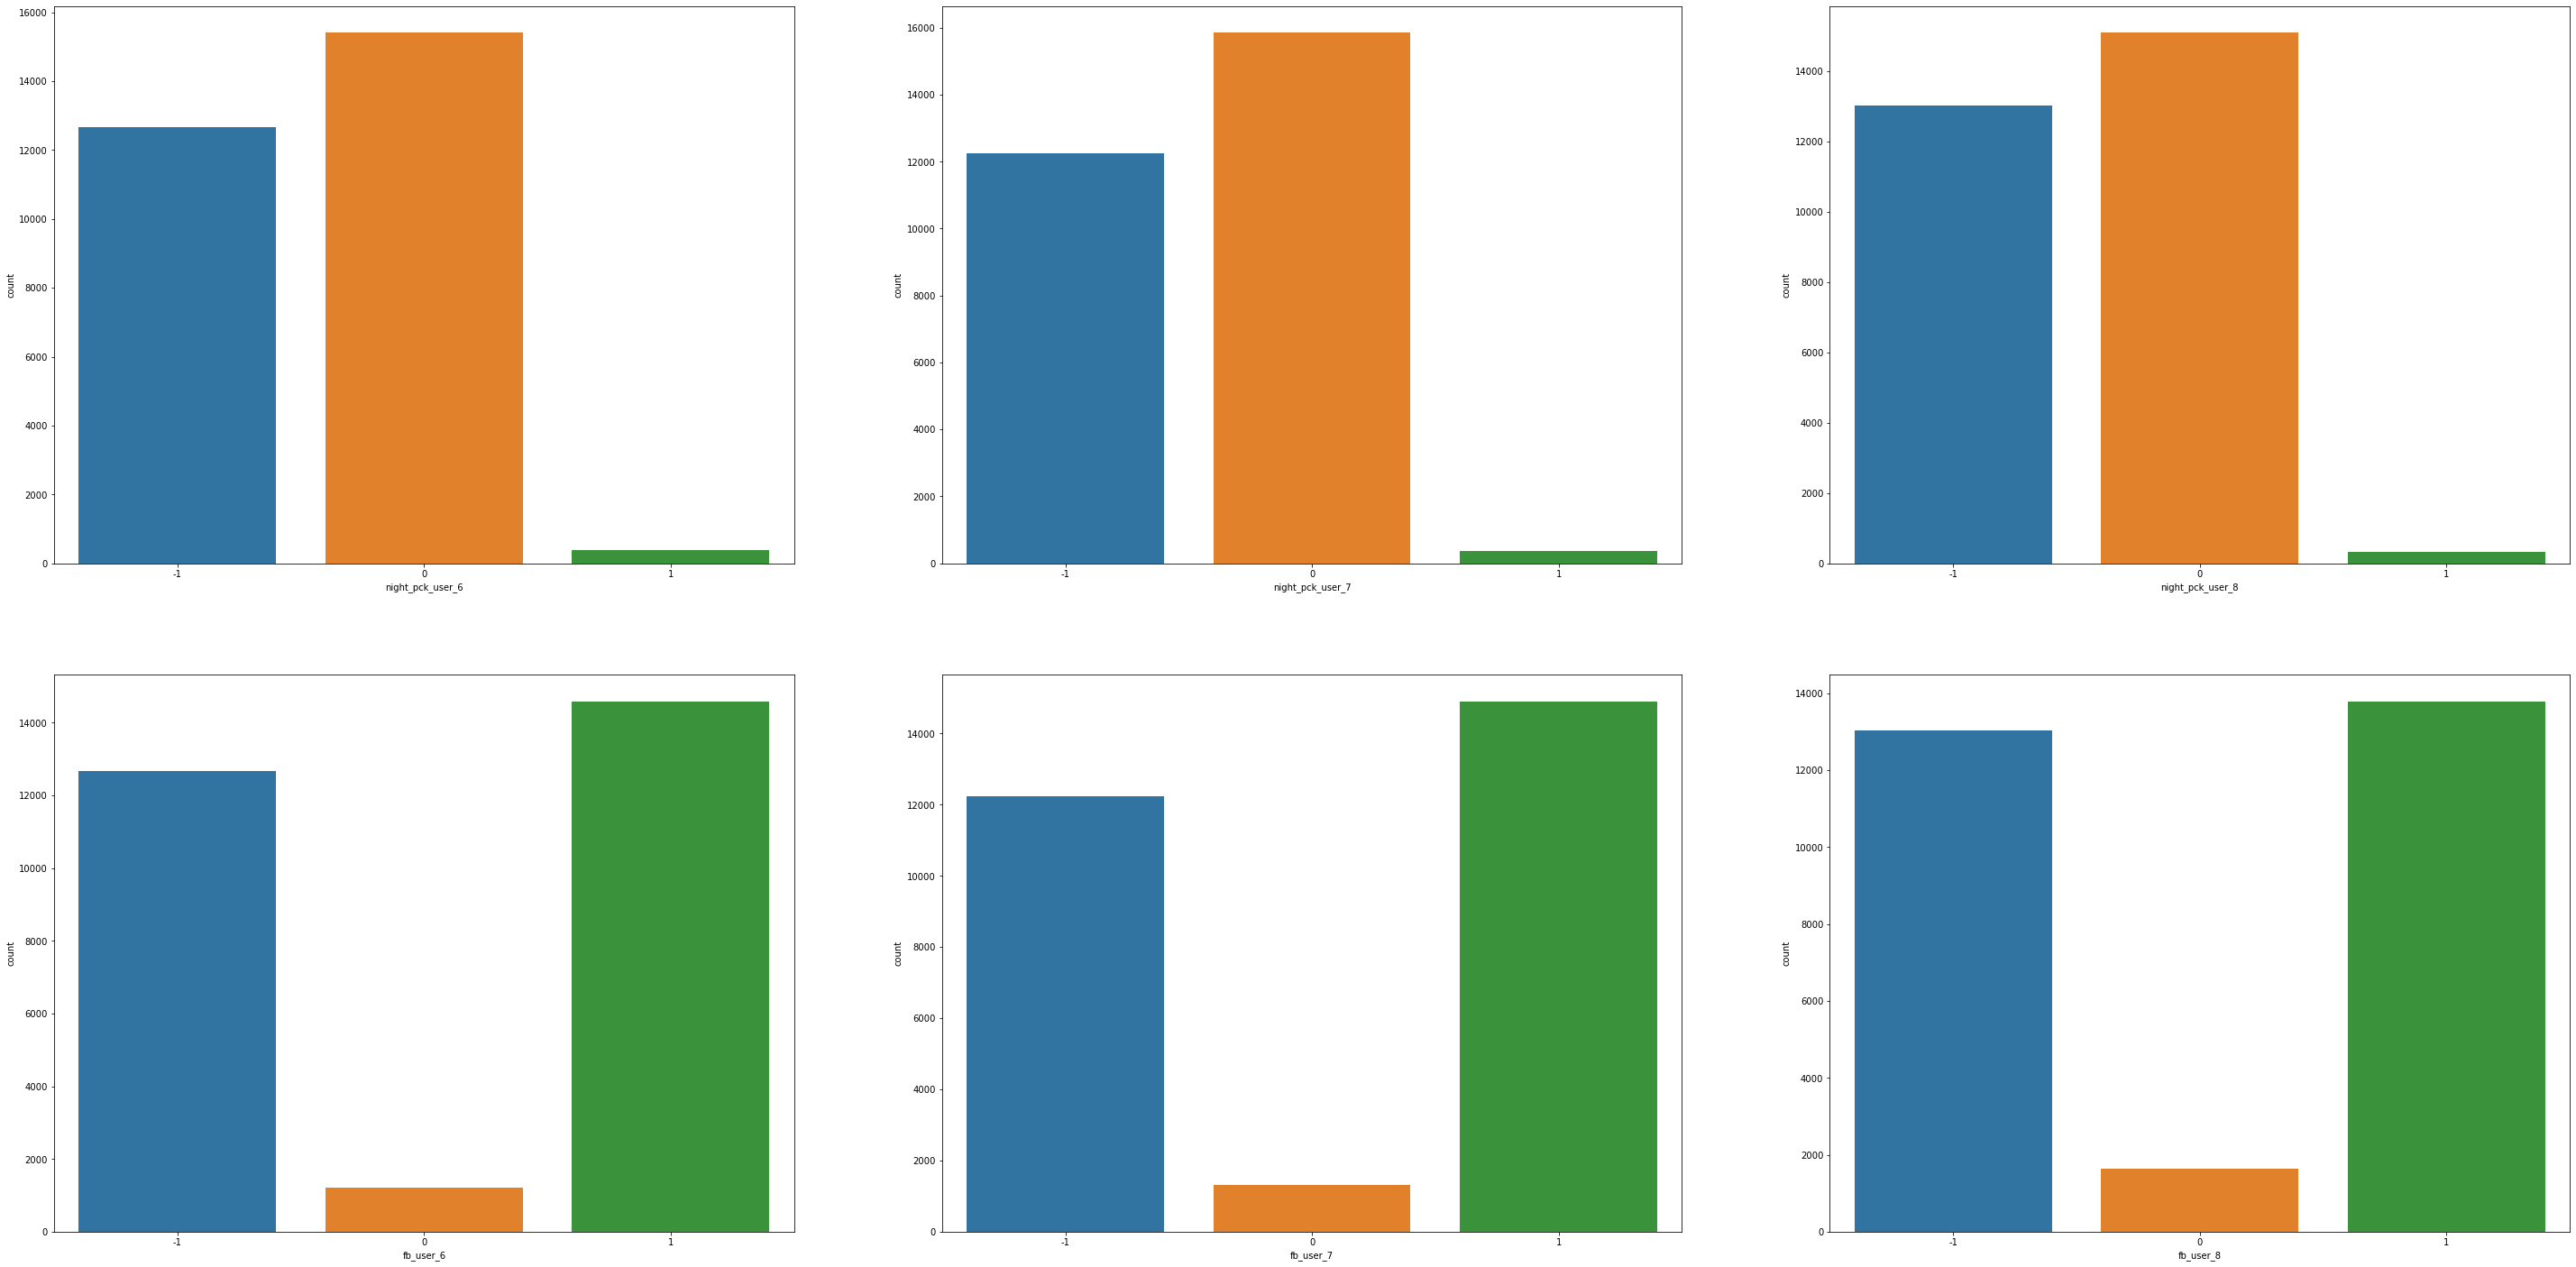

In [22]:
plt.figure(figsize=(50, 25))

i = 0
for col in cat_var:
    plt.subplot(2,3,i+1)
    sns.countplot(main_df[col])
    i = i+1

### <font color='#8B103E'> Bivariate Analysis : Visual inspection of data<font>
    
    
<font color='#000000'>After finding out our numerical and categorical variables, lets draw some plot to inspect data<font>
    


In [23]:
def bivariate(var1):
    sns.boxplot(main_df[var1], main_df['churn'])

In [24]:
plt.figure(figsize=(50, 550))

i = 0
for col in con_var:
    plt.subplot(49,3,i+1)
    bivariate(col)
    i = i+1

<h1><center><u><font color='#474EB5'>Data Preparations for model</h></center></u></font><a id = 'DPM'></a>

<font color='#000000'>By now we know our variable, now we will work on to <font color='#8B103E'>normalized and scale our variable to prepare out data for modeling</font>. 


### <font color='#474EB5'>Working for Categorical variables <a id = '1'></a>   


In [25]:
#Changing Dependent variable to numaric.
main_df['churn'] = pd.to_numeric(main_df['churn'])

In [26]:
#Lets see the uniques values in each and every categorical variable
for i in range(len(cat_var)):
    print("Total Unique values in",cat_var[i])
    print(len(main_df[cat_var[i]].unique()))
    print(main_df[cat_var[i]].unique(),'\n')

Total Unique values in night_pck_user_6
3
[-1, 1, 0]
Categories (3, int64): [-1, 1, 0] 

Total Unique values in night_pck_user_7
3
[-1, 0, 1]
Categories (3, int64): [-1, 0, 1] 

Total Unique values in night_pck_user_8
3
[-1, 0, 1]
Categories (3, int64): [-1, 0, 1] 

Total Unique values in fb_user_6
3
[-1, 1, 0]
Categories (3, int64): [-1, 1, 0] 

Total Unique values in fb_user_7
3
[-1, 1, 0]
Categories (3, int64): [-1, 1, 0] 

Total Unique values in fb_user_8
3
[-1, 1, 0]
Categories (3, int64): [-1, 1, 0] 



### <b><font color='#474EB5'> Encoading Categorical variables</b></font>.<a id = '2'></a>
As We observed that all the categorical variables have 3 uniques values, so we will created dummy variables to these columns<br>


In [27]:
# Assigning dummy variables to all categorical variables
main_df = pd.get_dummies(main_df, drop_first = True)
main_df.head(5)


arpu_8  onnet_mou_8  offnet_mou_8  roam_ic_mou_8  roam_og_mou_8  \
0 2029.36        52.29        325.91          31.64          38.06   
1  137.36        35.08        136.48           0.00           0.00   
2  637.76        85.14        983.39           0.00           0.00   
3  366.97        33.58        205.89           0.00           0.00   
4  409.23         0.00          0.00           0.00           0.00   

   loc_og_t2t_mou_8  loc_og_t2m_mou_8  loc_og_t2f_mou_8  loc_og_t2c_mou_8  \
0             40.28            162.28             53.23              0.00   
1             12.49             50.54              0.00              7.15   
2             23.34            104.81              1.58              0.00   
3             33.58            148.56              0.00             17.71   
4              0.00              0.00              0.00              0.56   

   loc_og_mou_8  std_og_t2t_mou_8  std_og_t2m_mou_8  std_og_t2f_mou_8  \
0        255.79             12.01             49.14             16.68   
1         63.04             22.58             75.69              0.00   
2        129.74             61.79            876.99              0.00   
3        182.14              0.00             39.61              0.00   
4          0.00              0.00              0.00              0.00   

   std_og_mou_8  isd_og_mou_8  spl_og_mou_8  og_others_8  total_og_mou_8  \
0         77.84         10.01          6.50         0.00          350.16   
1         98.28          0.00         10.23         0.00          171.56   
2        938.79          0.00          0.00         0.00         1068.54   
3         39.61          0.00         17.71         0.00          239.48   
4          0.00          0.00          0.56         0.00            0.56   

   loc_ic_t2t_mou_8  loc_ic_t2m_mou_8  loc_ic_t2f_mou_8  loc_ic_mou_8  \
0             27.31            121.19             39.53        188.04   
1              0.31             15.48              0.00         15.79   
2             19.54            129.16             10.39        159.11   
3             76.64            146.84              0.71        224.21   
4              2.45             37.93              0.16         40.54   

   std_ic_t2t_mou_8  std_ic_t2m_mou_8  std_ic_t2f_mou_8  std_ic_mou_8  \
0             30.39            141.33             22.21        193.94   
1              0.10              0.65              0.00          0.75   
2              0.18            101.74              0.00        101.93   
3             13.38             43.91              0.00         57.29   
4              0.05              0.86              0.13          1.04   

   total_ic_mou_8  spl_ic_mou_8  isd_ic_mou_8  ic_others_8  total_rech_num_8  \
0          428.74          0.00         31.59        15.14              7.00   
1           16.54          0.00          0.00         0.00             14.00   
2          261.04          0.00          0.00         0.00             27.00   
3          298.33          0.00          3.74        13.06              4.00   
4           41.79          0.00          0.00         0.20              1.00   

   total_rech_amt_8  max_rech_amt_8  last_day_rch_amt_8  total_rech_data_8  \
0           2439.02          675.55              525.04               0.00   
1            120.00           30.00               10.00               3.00   
2            718.00           50.00               50.00               0.00   
3            439.00          179.00                0.00               2.00   
4            455.00          455.00              455.00               1.00   

   max_rech_data_8  count_rech_2g_8  count_rech_3g_8  av_rech_amt_data_8  \
0             0.00             0.00             0.00                0.00   
1            23.00             3.00             0.00               69.00   
2             0.00             0.00             0.00                0.00   
3           179.00             0.00             2.00              270.00   
4           388

In [28]:
main_df.to_csv('Model Ready Data.csv', index = False)

In [29]:
main_df = pd.read_csv('Model Ready Data.csv', low_memory=False)
main_df.shape

(28460, 158)

### <font color='#474EB5'>Splitting data into Testing and Training & Scaling the variables<a id = '3'></a>

We will use scikit learn method to split our data for training and testing<br>
We will use 70-30 Split, where 70% data will be considered for Training and 30% will be for testing 


In [30]:
# We specify this so that the train and test data set always have the same rows
y = main_df.pop('churn')
X = main_df

# # scale
scaler = StandardScaler()
scaler.fit(X)

# split 70:30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)


print('Training Data contains total ' + blu + str(X_train.shape[0]) + ' Rows ' + nill
      + 'and ' + red + str(X_train.shape[1]) + ' Columns '+nill)

print('Testing Data contains total ' + blu + str(X_test.shape[0]) + ' Rows ' + nill
      + 'and ' + red + str(X_test.shape[1]) + ' Columns ')


Training Data contains total 19922 Rows and 157 Columns 
Testing Data contains total 8538 Rows and 157 Columns 


# <font color='#8B103E'><center><u>Model Building : High Performance Model </u>(I)<font></u></center> <a id = 'ridge'></a>
    
    
<font color='#000000'>After completing EDA, data cleaning, and data normalization, we will finally ready to start building our Regression Model.<font><br>
    We will now start performing Model to Compare

### <font color='#8B103E'><u>Treating Class Imbalance<font></u> <a id = 'R1'></a>
    
As our dependent variable is imbalanced because customer churn is only 8% and non-churn are 92%. This can bias the predictions of our model. Thus we will balance the variable using <font color='#8B103E'><b>Synthetic Minority Oversampling Technique (S.M.O.T.)</font></b> algorithm. 

In [31]:
# We will use SMOT to treat class imbalance in chur variable
sm = SMOTE()
X_train, y_train = sm.fit_sample(X_train, y_train)

#printing result post treatment
print('Total sample size for '+red+str(0)+nill+' in Test Data post class imbalance treatment is '+red+str(sum(y_train==0))+nill)
print('Total sample size for '+blu+str(1)+nill+' in Test Data post class imbalance treatment is '+blu+str(sum(y_train==1))+nill)


Total sample size for 0 in Test Data post class imbalance treatment is 18831
Total sample size for 1 in Test Data post class imbalance treatment is 18831


### <font color='#8B103E'>Principal Component Analysis<a id = '3'></a>

As we have high numbers of variable, we will be using <font color='#8B103E'><b>Principal Component Analysis (PCA)</font></b>. 
PCA is a statistical procedure that uses an orthogonal transformation which converts a set of correlated variables to a set of uncorrelated variables

-------------------------------------------------------------------------------------------------------------------
33 variables show the variance upto 99%
-------------------------------------------------------------------------------------------------------------------
visual representation of variance impact on columns


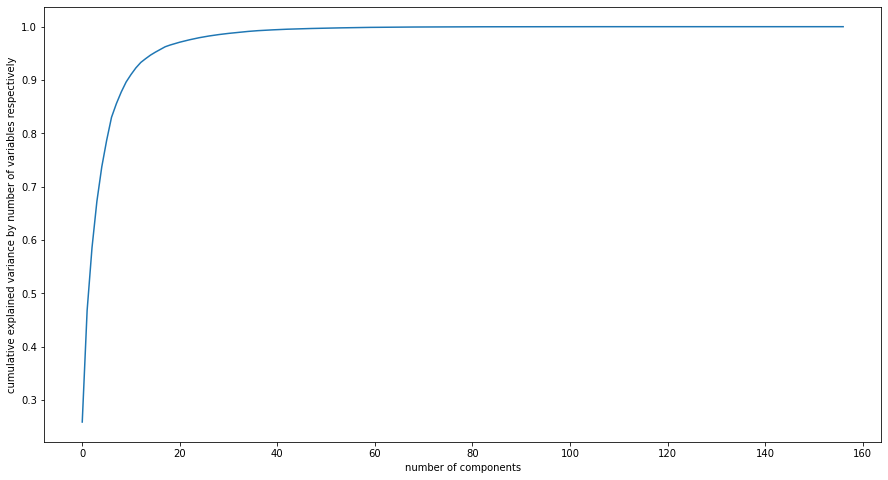

In [32]:
#Lets PErform PCA to reduce the nnumber of columns. 

pca = PCA()
pca.fit(X_train)
main_df_pca = pca.fit_transform(X_train)

#Calculate the variance till 99%
pca_var = np.round(pca.explained_variance_ratio_.cumsum(), 4)

# finding best numbers of variable till the variance of 99%
pca_var_99 = sum(pca_var<=.99)
print(blu+line+nill)
print(red+str(pca_var_99)+' variables ' + nill + 'show the variance upto '+red + '99%'+nill)
print(blu+line+nill)
print('visual representation of variance impact on columns')

#Plot a graph for visual representation
fig = plt.figure(figsize = (15,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance by number of variables respectively')
plt.show()


### <font color='#8B103E'>Logistic Regression with PCA<a id = '3'></a>

As we have high numbers of variable, we will be using <font color='#8B103E'><b>Principal Component Analysis (PCA)</font></b>. 
and we will be performing our logistic analysis on the variable supported by PCA

In [33]:
# As we calculated earlier that 33 variabls shows the variance upto 99% so we will be using those variables
pca = PCA(n_components = pca_var_99)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# fitting the model
lr = LogisticRegression()
lr.fit(X_train_pca, y_train)

# making predictions for train data
y_train_pred_lr = lr.predict(X_train_pca)

# mesuring parameters like sensitity, specificity for train data
sensitivity_train, specificity_train, _ = sensitivity_specificity_support(y_train, y_train_pred_lr, average='binary')
print(blu+line+'\nResults for Training Data :\n'+nill)
print("Sensitivity for train data: ",red, round(sensitivity_train,4),nill,"\nSpecificity for train data: ",red, round(specificity_train, 4),nill)
cm_train = confusion_matrix(y_train, y_train_pred_lr)
print(bold,'\nConfusion matrix for train data predictions',nill)
print('\n',cm_train)
print(blu+line+nill)

# making predictions for test data
y_test_pred_lr = lr.predict(X_test_pca)

# mesuring parameters like sensitity, specificity for test data
sensitivity_test, specificity_test, _ = sensitivity_specificity_support(y_test, y_test_pred_lr, average='binary')
print(blu+line+'\nResults for Testing Data :\n'+nill)
print("Sensitivity for test data: ",red, round(sensitivity_test,4),nill,"\nSpecificity for test data: ",red, round(specificity_test, 4),nill)
cm_test = confusion_matrix(y_test, y_test_pred_lr)
print(bold,'\nConfusion matrix for train data predictions',nill)
print('\n',cm_test)
print(blu+line+nill)

-------------------------------------------------------------------------------------------------------------------
Results for Training Data :

Sensitivity for train data:   0.8241  
Specificity for train data:   0.7878 
 
Confusion matrix for train data predictions 

 [[14835  3996]
 [ 3313 15518]]
-------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------
Results for Testing Data :

Sensitivity for test data:   0.8129  
Specificity for test data:   0.7969 
 
Confusion matrix for train data predictions 

 [[6408 1633]
 [  93  404]]
-------------------------------------------------------------------------------------------------------------------


### <font color='#8B103E'>Hyper Parameter Tuning for Logistic Regression<a id = '3'></a>

We have good result of regression model using PCA variables, now we will <font color='#8B103E'><b>hypertune to get Best Parameters</font></b>. 

In [34]:
# define models and parameters
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l1','l2']
c_values = [100, 10, 5, 4, 3, 2, 1.0, 0.1, 0.01,0.001]

# define grid search
grid = dict(penalty=penalty,C=c_values)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=5, scoring='accuracy',error_score=0,verbose=1)
grid_result = grid_search.fit(X_train_pca, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   10.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   15.7s finished


In [35]:
# cross validation results
pd.DataFrame(grid_result.cv_results_)

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0            0.02          0.00             0.00            0.00     100   
1            1.40          0.46             0.00            0.00     100   
2            0.02          0.00             0.00            0.00      10   
3            1.65          0.55             0.00            0.00      10   
4            0.03          0.01             0.00            0.00       5   
5            1.38          0.30             0.01            0.00       5   
6            0.03          0.01             0.00            0.00       4   
7            1.30          0.09             0.00            0.00       4   
8            0.03          0.01             0.00            0.00       3   
9            1.17          0.01             0.00            0.00       3   
10           0.03          0.01             0.00            0.00       2   
11           1.26          0.07             0.00            0.00       2   
12           0.03          0.00             0.00            0.00    1.00   
13           1.27          0.11             0.00            0.00    1.00   
14           0.04          0.01             0.00            0.00    0.10   
15           1.17          0.08             0.00            0.00    0.10   
16           0.03          0.00             0.00            0.00    0.01   
17           1.11          0.10             0.00            0.00    0.01   
18           0.03          0.00             0.00            0.00    0.00   
19           1.02          0.15             0.00            0.00    0.00   

   param_penalty                         params  split0_test_score  \
0             l1    {'C': 100, 'penalty': 'l1'}               0.00   
1             l2    {'C': 100, 'penalty': 'l2'}               0.80   
2             l1     {'C': 10, 'penalty': 'l1'}               0.00   
3             l2     {'C': 10, 'penalty': 'l2'}               0.80   
4             l1      {'C': 5, 'penalty': 'l1'}               0.00   
5             l2      {'C': 5, 'penalty': 'l2'}               0.80   
6             l1      {'C': 4, 'penalty': 'l1'}               0.00   
7             l2      {'C': 4, 'penalty': 'l2'}               0.80   
8             l1      {'C': 3, 'penalty': 'l1'}               0.00   
9             l2      {'C': 3, 'penalty': 'l2'}               0.80   
10            l1      {'C': 2, 'penalty': 'l1'}               0.00   
11            l2      {'C': 2, 'penalty': 'l2'}               0.80   
12            l1    {'C': 1.0, 'penalty': 'l1'}               0.00   
13            l2    {'C': 1.0, 'penalty': 'l2'}               0.80   
14            l1    {'C': 0.1, 'penalty': 'l1'}               0.00   
15            l2    {'C': 0.1, 'penalty': 'l2'}               0.80   
16            l1   {'C': 0.01, 'penalty': 'l1'}               0.00   
17            l2   {'C': 0.01, 'penalty': 'l2'}               0.80   
18            l1  {'C': 0.001, 'penalty': 'l1'}               0.00   
19            l2  {'C': 0.001, 'penalty': 'l2'}               0.80   

    split1_test_score  split2_test_score  split3_test_score  \
0                0.00               0.00               0.00   
1                0.80               0.81               0.81   
2                0.00               0.00               0.00   
3                0.80               0.82               0.81   
4                0.00               0.00               0.00   
5                0.80               0.81               0.81   
6                0.00               0.00               0.00   
7                0.80               0.82               0.81   
8                0.00               0.00               0.00   
9                0.80               0.81               0.81   
10               0.00               0.00               0.00   
11               0.80               0.82               0.81   
12               0.00               0.00               0.00   
13               0.80               0.81              

In [36]:
# print best hyperparameters
print("Best hyperparameters: ", grid_result.best_params_)

Best hyperparameters:  {'C': 0.1, 'penalty': 'l2'}


### <font color='#8B103E'>Logistic Regression Model Score post Hypertuning<a id = '3'></a>

We have good result of regression model using PCA variables, now we will <font color='#8B103E'><b>hypertune to get Best Parameters</font></b>. 

In [37]:
# predict churn on test data
lr_tuned = LogisticRegression(C = 10, penalty = 'l2')
lr_tuned.fit(X_train_pca, y_train)

y_pred = lr_tuned.predict(X_test_pca)

sensitivity_test_gs, specificity_test_gs, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print(blu+line+'\nLogistic Regression Results for Testing Data Post Hyper tuning:\n'+nill)
print("Sensitivity for test data: ",red, round(sensitivity_test_gs,4),nill,
      "\nSpecificity for test data: ",red, round(specificity_test_gs, 4),nill,
      "\nAccuracy for test data: ",red, round(roc_auc_score(y_test, y_pred),2),nill)

#confusion Metrics
cm = confusion_matrix(y_test, y_pred)
print(bold,'\nConfusion matrix for train data predictions',nill)
print('\n',cm_test)
print(blu+line+nill)

-------------------------------------------------------------------------------------------------------------------
Logistic Regression Results for Testing Data Post Hyper tuning:

Sensitivity for test data:   0.8189  
Specificity for test data:   0.7964  
Accuracy for test data:   0.81 
 
Confusion matrix for train data predictions 

 [[6408 1633]
 [  93  404]]
-------------------------------------------------------------------------------------------------------------------


### <font color='#8B103E'>Random Forest with PCA<a id = '3'></a>

As we have high numbers of variable, we will be using <font color='#8B103E'><b>Principal Component Analysis (PCA)</font></b>. 
and we will be performing our Random Forest on the variable supported by PCA

In [38]:
# fitting the model
rf_model = RandomForestClassifier()
rf_model.fit(X_train_pca,y_train)

# making predictions for train data
y_train_pred_rf = rf_model.predict(X_train_pca)

# mesuring parameters like sensitity, specificity for train data
sensitivity_train_rf, specificity_train_rf, _ = sensitivity_specificity_support(y_train, y_train_pred_rf, average='binary')
print(blu+line+'\nRandom Forest Model Results for Training Data :\n'+nill)
print("Sensitivity for train data: ",red, round(sensitivity_train_rf,4),nill,
      "\nSpecificity for train data: ",red, round(specificity_train_rf, 4),nill)
cm_train = confusion_matrix(y_train, y_train_pred_rf)
print(bold,'\nConfusion matrix for train data predictions',nill)
print('\n',cm_train)
print(blu+line+nill)

# making predictions for test data
y_test_pred_rf = rf_model.predict(X_test_pca)

# mesuring parameters like sensitity, specificity for test data
sensitivity_test_rf, specificity_test_rf, _ = sensitivity_specificity_support(y_test, y_test_pred_rf, average='binary')
print(blu+line+'\nRandom Forest Model Results for Testing Data :\n'+nill)
print("Sensitivity for test data: ",red, round(sensitivity_test_rf,4),nill,
      "\nSpecificity for test data: ",red, round(specificity_test_rf, 4),nill)
cm_test = confusion_matrix(y_test, y_test_pred_rf)
print(bold,'\nConfusion matrix for train data predictions',nill)
print('\n',cm_test)
print(blu+line+nill)

-------------------------------------------------------------------------------------------------------------------
Random Forest Model Results for Training Data :

Sensitivity for train data:   1.0  
Specificity for train data:   1.0 
 
Confusion matrix for train data predictions 

 [[18831     0]
 [    0 18831]]
-------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------
Random Forest Model Results for Testing Data :

Sensitivity for test data:   0.4306  
Specificity for test data:   0.9585 
 
Confusion matrix for train data predictions 

 [[7707  334]
 [ 283  214]]
-------------------------------------------------------------------------------------------------------------------


### <font color='#8B103E'>Hyper Parameter Tuning for Random Forest<a id = '3'></a>

We have good result of regression model using PCA variables, now we will <font color='#8B103E'><b>hypertune to get Best Parameters</font></b>. 


In [39]:
# define models and parameters
param_grid = {
    'max_depth': range(8,14),
    'min_samples_leaf': range(100, 400, 100),
    'min_samples_split': range(100, 300, 100),
    'max_features': range(8,10)
}
rf_cv = RandomForestClassifier()

grid_search_rf = GridSearchCV(estimator = rf_cv, param_grid = param_grid, cv = 5, n_jobs = 8,verbose = 1,scoring="f1_weighted")
grid_result_rf = grid_search_rf.fit(X_train_pca, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:  2.8min
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed: 15.1min
[Parallel(n_jobs=8)]: Done 360 out of 360 | elapsed: 30.8min finished


In [40]:
# cross validation results
pd.DataFrame(grid_result_rf.cv_results_)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0           36.39          0.77             0.18            0.01   
1           35.34          1.76             0.18            0.02   
2           32.18          0.90             0.20            0.02   
3           32.21          0.37             0.17            0.02   
4           30.89          0.87             0.16            0.01   
5           29.87          0.60             0.18            0.00   
6           40.52          0.84             0.20            0.03   
7           40.38          1.10             0.16            0.01   
8           32.23          0.77             0.21            0.09   
9           42.45          6.67             0.29            0.10   
10          47.80          1.02             0.29            0.04   
11          38.44          3.96             0.17            0.02   
12          36.96          1.12             0.20            0.02   
13          37.98          0.80             0.22            0.02   
14          39.14          1.00             0.21            0.03   
15          38.22          1.39             0.17            0.01   
16          28.79          0.21             0.17            0.01   
17          31.60          2.02             0.20            0.03   
18          47.50          0.78             0.23            0.03   
19          43.59          2.97             0.17            0.01   
20          36.16          0.46             0.18            0.01   
21          39.83          1.60             0.24            0.02   
22          40.59          1.08             0.20            0.05   
23          37.32          1.22             0.16            0.00   
24          36.01          0.67             0.20            0.01   
25          40.98          4.16             0.27            0.05   
26          46.31          0.54             0.24            0.02   
27          38.95          4.62             0.16            0.02   
28          30.17          0.97             0.16            0.01   
29          29.05          0.29             0.17            0.01   
30          44.86          4.15             0.27            0.05   
31          52.69          1.85             0.28            0.07   
32          43.15          2.09             0.16            0.02   
33          35.72          2.10             0.18            0.03   
34          33.40          1.20             0.19            0.01   
35          38.88          1.83             0.25            0.03   
36          49.94          1.91             0.27            0.07   
37          46.14          1.99             0.18            0.01   
38          36.54          0.53             0.22            0.02   
39          42.35          3.00             0.29            0.03   
40          42.54          1.23             0.19            0.01   
41          34.27          3.53             0.17            0.02   
42          40.42          0.45             0.21            0.03   
43          43.72          2.60             0.27            0.06   
44          50.00          4.77             0.32            0.06   
45          54.90          1.80             0.19            0.01   
46          37.84          4.60             0.16            0.01   
47          33.91          0.49             0.18            0.01   
48          46.50          4.19             0.29            0.03   
49          52.27          1.24             0.23            0.04   
50          36.37          2.30             0.16            0.01   
51          31.65          0.97             0.18            0.01   
52          31.02          0.75             0.18            0.01   
53          35.32          1.46             0.23            0.03   
54          56.29          0.89             0.23            0.02   
55          50.87          3.79             0.22            0.02   
56          41.87          1.87             0.23            0.03   
57          50.68          2.17             0.22            

In [41]:
# print best hyperparameters
print("Best hyperparameters: ", grid_result_rf.best_params_)

Best hyperparameters:  {'max_depth': 13, 'max_features': 9, 'min_samples_leaf': 100, 'min_samples_split': 200}


### <font color='#8B103E'>Random Forest Model Score post Hypertuning<a id = '3'></a>

We have good result of Random Forest model using PCA variables, now we will <font color='#8B103E'><b>hypertune to get Best Parameters</font></b>. 

In [42]:
# predict churn on test data
rf_tuned = RandomForestClassifier(class_weight='balanced',max_depth=13,min_samples_leaf=100,min_samples_split=200,
                             max_features=9,random_state=10)

rf_tuned.fit(X_train_pca, y_train)

y_pred = rf_tuned.predict(X_test_pca)

sensitivity_test__rf_gs, specificity_test__rf_gs, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print(blu+line+'\nRandom Forest Results for Testing Data Post Hyper tuning:\n'+nill)
print("Sensitivity for test data: ",red, round(sensitivity_test__rf_gs,4),nill,
      "\nSpecificity for test data: ",red, round(specificity_test__rf_gs, 4),nill,
      "\nAccuracy for test data: ",red, round(roc_auc_score(y_test, y_pred),2),nill)

#confusion Metrics
cm = confusion_matrix(y_test, y_pred)
print(bold,'\nConfusion matrix for train data predictions',nill)
print('\n',cm_test)
print(blu+line+nill)

-------------------------------------------------------------------------------------------------------------------
Random Forest Results for Testing Data Post Hyper tuning:

Sensitivity for test data:   0.6982  
Specificity for test data:   0.8865  
Accuracy for test data:   0.79 
 
Confusion matrix for train data predictions 

 [[7707  334]
 [ 283  214]]
-------------------------------------------------------------------------------------------------------------------


### <font color='#8B103E'>XGBoost with PCA<a id = '3'></a>

As we have high numbers of variable, we will be using <font color='#8B103E'><b>Principal Component Analysis (PCA)</font></b>. 
and we will be performing our XGBoost on the variable supported by PCA

In [43]:
# fitting the model
xgb_model = XGBClassifier()
xgb_model.fit(X_train_pca,y_train)

# making predictions for train data
y_train_pred_xgb = xgb_model.predict(X_train_pca)

# mesuring parameters like sensitity, specificity for train data
sensitivity_train_xgb, specificity_train_xgb, _ = sensitivity_specificity_support(y_train, y_train_pred_xgb, average='binary')
print(blu+line+'\nXGBoost Results for Training Data :\n'+nill)
print("Sensitivity for train data: ",red, round(sensitivity_train_xgb,4),nill,
      "\nSpecificity for train data: ",red, round(specificity_train_xgb, 4),nill)
cm_train = confusion_matrix(y_train, y_train_pred_xgb)
print(bold,'\nConfusion matrix for train data predictions',nill)
print('\n',cm_train)
print(blu+line+nill)

# making predictions for test data
y_test_pred_xgb = xgb_model.predict(X_test_pca)

# mesuring parameters like sensitity, specificity for test data
sensitivity_test_xgb, specificity_test_xgb, _ = sensitivity_specificity_support(y_test, y_test_pred_xgb, average='binary')
print(blu+line+'\nRandom Forest Model Results for Testing Data :\n'+nill)
print("Sensitivity for test data: ",red, round(sensitivity_test_xgb,4),nill,
      "\nSpecificity for test data: ",red, round(specificity_test_xgb, 4),nill)
cm_test = confusion_matrix(y_test, y_test_pred_xgb)
print(bold,'\nConfusion matrix for train data predictions',nill)
print('\n',cm_test)
print(blu+line+nill)

-------------------------------------------------------------------------------------------------------------------
XGBoost Results for Training Data :

Sensitivity for train data:   0.9973  
Specificity for train data:   0.9788 
 
Confusion matrix for train data predictions 

 [[18432   399]
 [   50 18781]]
-------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------
Random Forest Model Results for Testing Data :

Sensitivity for test data:   0.5272  
Specificity for test data:   0.9342 
 
Confusion matrix for train data predictions 

 [[7512  529]
 [ 235  262]]
-------------------------------------------------------------------------------------------------------------------


### <font color='#8B103E'>Hyper Parameter Tuning for XGBoost<a id = '3'></a>

We have good result of regression model using PCA variables, now we will <font color='#8B103E'><b>hypertune to get Best Parameters</font></b>. 


In [45]:
# define models and parameters
param_test1 = {'max_depth':range(5,15,2),'min_child_weight':range(1,6,2)}

xgb_cv = XGBClassifier()

grid_search_xgb = GridSearchCV(estimator = xgb_cv, param_grid = param_test1, cv = 5, n_jobs = 8,verbose = 1,scoring="f1_weighted")
grid_result_xgb = grid_search_xgb.fit(X_train_pca, y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:  4.9min
[Parallel(n_jobs=8)]: Done  75 out of  75 | elapsed: 11.8min finished


In [46]:
# cross validation results
pd.DataFrame(grid_result_xgb.cv_results_)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0           39.23          0.40             0.12            0.00   
1           42.57          5.35             0.16            0.06   
2           47.90          0.64             0.19            0.01   
3           64.52          4.32             0.15            0.02   
4           60.10          3.89             0.17            0.03   
5           61.12          1.47             0.20            0.02   
6           76.67          2.29             0.27            0.05   
7           73.55          1.73             0.22            0.03   
8           70.51          0.53             0.18            0.01   
9           86.34          1.06             0.27            0.04   
10          85.97          1.01             0.22            0.03   
11          90.23          5.27             0.21            0.04   
12         100.52          4.01             0.28            0.07   
13          94.82          3.85             0.30            0.08   
14          79.27         11.50             0.17            0.01   

   param_max_depth param_min_child_weight  \
0                5                      1   
1                5                      3   
2                5                      5   
3                7                      1   
4                7                      3   
5                7                      5   
6                9                      1   
7                9                      3   
8                9                      5   
9               11                      1   
10              11                      3   
11              11                      5   
12              13                      1   
13              13                      3   
14              13                      5   

                                      params  split0_test_score  \
0    {'max_depth': 5, 'min_child_weight': 1}               0.93   
1    {'max_depth': 5, 'min_child_weight': 3}               0.93   
2    {'max_depth': 5, 'min_child_weight': 5}               0.93   
3    {'max_depth': 7, 'min_child_weight': 1}               0.96   
4    {'max_depth': 7, 'min_child_weight': 3}               0.96   
5    {'max_depth': 7, 'min_child_weight': 5}               0.96   
6    {'max_depth': 9, 'min_child_weight': 1}               0.97   
7    {'max_depth': 9, 'min_child_weight': 3}               0.97   
8    {'max_depth': 9, 'min_child_weight': 5}               0.96   
9   {'max_depth': 11, 'min_child_weight': 1}               0.97   
10  {'max_depth': 11, 'min_child_weight': 3}               0.97   
11  {'max_depth': 11, 'min_child_weight': 5}               0.96   
12  {'max_depth': 13, 'min_child_weight': 1}               0.97   
13  {'max_depth': 13, 'min_child_weight': 3}               0.97   
14  {'max_depth': 13, 'min_child_weight': 5}               0.96   

    split1_test_score  split2_test_score  split3_test_score  \
0                0.93               0.93               0.94   
1                0.93               0.94               0.94   
2                0.93               0.93               0.94   
3                0.96               0.96               0.96   
4                0.96               0.96               0.96   
5                0.96               0.96               0.96   
6                0.97               0.97               0.97   
7                0.97               0.97               0.97   
8                0.96               0.97               0.97   
9                0.96               0.97               0.97   
10               0.97               0.97               0.97   
11               0.96               0.97               0.96   
12               0.97               0.97               0.97   
13               0.96               0.97               0.97   
14               0.97               0.97               0.97   

    split4_test_score  mean_test_score  std_test_score  rank_test_score  
0                0.93             0.93

In [47]:
# print best hyperparameters
print("Best hyperparameters: ", grid_result_xgb.best_params_)

Best hyperparameters:  {'max_depth': 13, 'min_child_weight': 1}


### <font color='#8B103E'>XGBoost Model Score post Hypertuning<a id = '3'></a>

We have good result of Random Forest model using PCA variables, now we will <font color='#8B103E'><b>hypertune to get Best Parameters</font></b>. 

In [48]:
# predict churn on test data
XGB_tuned = XGBClassifier(learning_rate =0.1, n_estimators=140, max_depth= 13, min_child_weight= 1)

XGB_tuned.fit(X_train_pca, y_train)

y_pred = XGB_tuned.predict(X_test_pca)

sensitivity_test__XGB_gs, specificity_test__XGB_gs, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print(blu+line+'\nXGBoost Results for Testing Data Post Hyper tuning:\n'+nill)
print("Sensitivity for test data: ",red, round(sensitivity_test__XGB_gs,4),nill,
      "\nSpecificity for test data: ",red, round(specificity_test__XGB_gs, 4),nill,
      "\nAccuracy for test data: ",red, round(roc_auc_score(y_test, y_pred),2),nill)

#confusion Metrics
cm = confusion_matrix(y_test, y_pred)
print(bold,'\nConfusion matrix for train data predictions',nill)
print('\n',cm_test)
print(blu+line+nill)

-------------------------------------------------------------------------------------------------------------------
XGBoost Results for Testing Data Post Hyper tuning:

Sensitivity for test data:   0.4427  
Specificity for test data:   0.9546  
Accuracy for test data:   0.7 
 
Confusion matrix for train data predictions 

 [[7512  529]
 [ 235  262]]
-------------------------------------------------------------------------------------------------------------------


# <font color='#f69e7b'><center><u>Predictive Feature Identifications (II) </u>(I)<font></u></center> <a id = 'ridge'></a>
    
    
<font color='#000000'>As per the business requirement, After finding the best model we will not find the most influencive Feature which impact the Churn of the customer.<font><br>


### <font color='#8B103E'><u>Feature Importance Using Random Forest<font></u> <a id = 'R1'></a>
    
Based on the tuned parameter, we will use Random forest to determine the importance of the features. 

In [49]:
# tuning parameters based on above output that we received from gridsearchcv
{'max_depth': 13, 'max_features': 9, 'min_samples_leaf': 100, 'min_samples_split': 200}

rf_features = RandomForestClassifier(max_features=9,
                                     n_estimators=100,
                                     min_samples_split=200,
                                     min_samples_leaf=100,
                                     max_depth=13,
                                     random_state=10)

rf_features.fit(X_train,y_train)
y_train_pred_rf = rf_features.predict(X_train)

rf_features.feature_importances_
features = pd.Series(rf_features.feature_importances_*100, index=X.columns)
features.nlargest(len(X.columns)).sort_values(ascending = False)


roam_og_mou_8           13.55
roam_ic_mou_8            7.89
night_pck_user_8_0       4.47
loc_ic_mou_8             3.43
roam_ic_mou_Diff         3.15
total_ic_mou_8           3.15
roam_og_mou_Diff         3.12
loc_og_mou_8             2.58
loc_ic_t2m_mou_8         2.45
total_rech_amt_Diff      2.17
fb_user_8_1              2.03
av_rech_amt_data_8       1.97
arpu_Diff                1.90
arpu_8                   1.85
total_ic_mou_Diff        1.79
loc_ic_t2m_mou_Diff      1.76
last_day_rch_amt_8       1.75
total_rech_data_8        1.72
total_rech_amt_8         1.60
loc_og_t2m_mou_8         1.48
last_day_rch_amt_Diff    1.40
loc_ic_t2t_mou_8         1.28
total_og_mou_8           1.27
total_og_mou_Diff        1.27
max_rech_data_8          1.27
roam_ic_mou_gp           1.26
std_og_mou_Diff          1.24
total_rech_num_Diff      1.18
max_rech_amt_8           1.15
loc_ic_mou_Diff          1.00
onnet_mou_Diff           0.90
roam_og_mou_gp           0.72
std_og_t2t_mou_Diff      0.71
loc_ic_t2t

## Thank you